In [93]:
import pandas as pd

### Assign weight per each model
This data get from individual f1-score per each model.

In [114]:
tag_list = ['B-AGE', 'B-HOSPITAL', 'B-MEDICALRECORD', 'B-ORGANIZATION', 'B-PER', 'B-PROFESSION', 'B-STATE', 'B-STREET',
            'CITY', 'COUNTRY', 'DATE', 'EMAIL', 'FAX', 'I-AGE', 'I-HOSPITAL', 'I-MEDICALRECORD', 'I-ORGANIZATION',
            'I-PER', 'I-PROFESSION', 'I-STATE', 'I-STREET', 'IDNUM', 'O', 'PHONE', 'USERNAME', 'ZIP']


In [115]:
lstm_weight = {
    'B-AGE': 71.32,
    'B-HOSPITAL': 75.22,
    'B-MEDICALRECORD': 65.37,
    'B-ORGANIZATION': 21.88,
    'B-PER': 66.52,
    'B-PROFESSION': 39.44,
    'B-STATE': 71.43,
    'B-STREET': 20.41,
    'CITY': 62.82,
    'COUNTRY': 12.1,
    'DATE': 79.13,
    'EMAIL': 0.01,
    'FAX': 0.03,
    'I-AGE': 0.28,
    'I-HOSPITAL': 76.37,
    'I-MEDICALRECORD': 45.54,
    'I-ORGANIZATION': 8.12,
    'I-PER': 49.86,
    'I-PROFESSION': 45.57,
    'I-STATE': 0.04,
    'I-STREET': 75.82,
    'IDNUM': 46.5,
    'O': 100,
    'PHONE': 24.2,
    'USERNAME': 50.89,
    'ZIP': 60.38
}


In [116]:
spacy_weight = {
    'B-AGE': 75.94,
    'B-HOSPITAL': 71.71,
    'B-MEDICALRECORD': 72.16,
    'B-ORGANIZATION': 40.74,
    'B-PER': 67.86,
    'B-PROFESSION': 41.79,
    'B-STATE': 80.84,
    'B-STREET': 15.87,
    'CITY': 54.39,
    'COUNTRY': 48.57,
    'DATE': 88.6,
    'EMAIL': 66.67,
    'FAX': 0,
    'I-AGE': 0,
    'I-HOSPITAL': 77.58,
    'I-MEDICALRECORD': 34.36,
    'I-ORGANIZATION': 25.88,
    'I-PER': 52.59,
    'I-PROFESSION': 58.09,
    'I-STATE': 0,
    'I-STREET': 76.71,
    'IDNUM': 58.02,
    'O': 98.43,
    'PHONE': 42.72,
    'USERNAME': 92.94,
    'ZIP': 56.27
}


In [117]:
bert_weight = {
    'B-AGE': 0.51,
    'B-HOSPITAL': 0,
    'B-MEDICALRECORD': 0,
    'B-ORGANIZATION': 0,
    'B-PER': 31.93,
    'B-PROFESSION': 0,
    'B-STATE': 5.69,
    'B-STREET': 0,
    'CITY': 0,
    'COUNTRY': 91.54,
    'DATE': 0,
    'EMAIL': 0,
    'FAX': 60.4,
    'I-AGE': 0,
    'I-HOSPITAL': 48.97,
    'I-MEDICALRECORD': 0,
    'I-ORGANIZATION': 11.06,
    'I-PER': 69.61,
    'I-PROFESSION': 8.33,
    'I-STATE': 69.19,
    'I-STREET': 0,
    'IDNUM': 38.82,
    'O': 98.56,
    'PHONE': 32.67,
    'USERNAME': 28.03,
    'ZIP': 0
}


### load data that is compbination of three model out put over the test file

In [118]:
test_data = pd.read_csv("/home/jovyan/work/data/hybrid/bert_output.csv", low_memory=False)


### Voting system

In [119]:
import pandas as pd

def apply_voting_system(df, lstm_col, spacy_col, bert_col):
    # Apply voting system
    votes = []

    for lstm_tag, spacy_tag, bert_tag in zip(df[lstm_col], df[spacy_col], df[bert_col]):
        if lstm_tag == spacy_tag == bert_tag:
            votes.append(lstm_tag)
        else:
            tag_counts = count_occurrences([lstm_tag,spacy_tag,bert_tag])
            votes.append(vote_court(tag_counts))
    return votes


In [120]:
def count_occurrences(lst):
    counts = {}
    for tag in lst:
        counts[tag] = lst.count(tag)
    return counts

In [121]:
def vote_court(tag_counts):
    tag_counts =tag_counts
    if "O" in tag_counts.keys():
        del tag_counts["O"]

    most_common_tag = max(tag_counts, key=tag_counts.get)
    return most_common_tag


In [122]:
# Mock-up data
data = {
    "lstm": ["O", "O", "tag2", "tag2"],
    "spacy": ["tag1", "O", "tag3", "tag2"],
    "bert": ["O", "O", "O", "O"]
}

voting_col = apply_voting_system(test_data,"y_pred_lstm","y_pred_spacy","y_pred_bert")
test_data["y_pred_vot"] = voting_col


In [123]:
voting_col

['O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-

### Arg max

In [137]:
def apply_arg_max(df, lstm_col, spacy_col, bert_col):
    # Apply voting system
    arg_max_col = []

    for lstm_tag, spacy_tag, bert_tag in zip(df[lstm_col], df[spacy_col], df[bert_col]):
        if lstm_tag == spacy_tag == bert_tag:
            arg_max_col.append(lstm_tag)
        else:
            arg_max_col.append(arg_max_court(lstm_tag, spacy_tag, bert_tag))
    return arg_max_col


In [144]:
def arg_max_court(lstm_tag, spacy_tag, bert_tag):
    # tags = [lstm_tag, spacy_tag, bert_tag]
    # weight = [lstm_weight[lstm_tag],spacy_weight[spacy_tag],bert_weight[bert_tag]]
    weight = []
    tags = []
    if lstm_tag in lstm_weight:
        weight.append(lstm_weight[lstm_tag])
        tags.append(lstm_tag)
    if spacy_tag in spacy_weight:
        weight.append(spacy_weight[spacy_tag])
        tags.append(spacy_tag)
    if bert_tag in bert_weight:
        weight.append(bert_weight[bert_tag])
        tags.append(bert_tag)

    for index,tag in enumerate(tags):
        if tag == "O":
            del tags[index]
            del weight[index]
    if len(weight) != 0:
        max_index = weight.index(max(weight))
        chosen_tag = tags[max_index]
    else:
        chosen_tag = "o"
    return chosen_tag



In [148]:
arg_max_col = apply_arg_max(test_data,"y_pred_lstm","y_pred_spacy","y_pred_bert")
test_data["y_pred_arg"] = arg_max_col

In [146]:
arg_max_col

['O',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'O',
 'O',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-STATE',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'O',
 'USERNAME',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-STATE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'O',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-AGE',
 'B-MEDICALRECORD',
 'B-AGE',
 'O',
 'B-AGE',
 'B-AGE',
 'B

# Evaluation

In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics_per_tag(y_true, y_pred):
    metrics_per_tag = {}
    precision_col = []
    f1_col = []
    recall_col = []
    tag_col = []
    for tag in tag_list:
        true_mask = (y_true == tag)
        pred_mask = (y_pred == tag)

        precision = precision_score(true_mask, pred_mask)
        recall = recall_score(true_mask, pred_mask)
        f1 = f1_score(true_mask, pred_mask)

        precision_col.append(round(precision*100,2))
        f1_col.append(round(f1*100,2))
        recall_col.append(round(recall *100,2))
        tag_col.append(tag)

    df = pd.DataFrame({'tag': tag_list, 'f1': f1_col, 'precision': precision_col, 'recall': recall_col})
    print(df)
    return df



In [156]:
metrics_lstm = calculate_metrics_per_tag(test_data['tag'], test_data['y_pred_lstm'])
output_file = "/home/jovyan/work/data/hybrid/lstm_metric.csv"
metrics_lstm.to_csv(output_file, index=False)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

                tag     f1  precision  recall
0             B-AGE  63.11      63.40   62.82
1        B-HOSPITAL  61.86      82.01   49.66
2   B-MEDICALRECORD  25.74      35.78   20.10
3    B-ORGANIZATION   0.00       0.00    0.00
4             B-PER  65.15      65.86   64.45
5      B-PROFESSION   0.00       0.00    0.00
6           B-STATE   0.00       0.00    0.00
7          B-STREET   1.28     100.00    0.65
8              CITY   3.59      85.71    1.83
9           COUNTRY   0.00       0.00    0.00
10             DATE  76.81      81.41   72.70
11            EMAIL   0.00       0.00    0.00
12              FAX   0.00       0.00    0.00
13            I-AGE   0.00       0.00    0.00
14       I-HOSPITAL  72.67      81.63   65.48
15  I-MEDICALRECORD  16.40      60.40    9.49
16   I-ORGANIZATION   0.00       0.00    0.00
17            I-PER  43.00      49.21   38.19
18     I-PROFESSION   0.00       0.00    0.00
19          I-STATE   0.00       0.00    0.00
20         I-STREET  45.36      79

In [159]:
metrics_spacy = calculate_metrics_per_tag(test_data['tag'], test_data['y_pred_spacy'])
output_file = "/home/jovyan/work/data/hybrid/spacy_metric.csv"
metrics_spacy.to_csv(output_file, index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                tag      f1  precision  recall
0             B-AGE   61.54      50.78   78.09
1        B-HOSPITAL   71.45      71.01   71.90
2   B-MEDICALRECORD   69.05      74.04   64.69
3    B-ORGANIZATION   35.86      39.39   32.91
4             B-PER   64.16      64.95   63.40
5      B-PROFESSION   43.34      39.55   47.95
6           B-STATE    0.03       0.02   71.52
7          B-STREET    2.40      16.67    1.29
8              CITY   54.05      53.96   54.13
9           COUNTRY   44.78      55.56   37.50
10             DATE   78.01      87.73   70.23
11            EMAIL  100.00     100.00  100.00
12              FAX    0.00       0.00    0.00
13            I-AGE    0.00       0.00    0.00
14       I-HOSPITAL   73.01      67.88   78.99
15  I-MEDICALRECORD    0.00       0.00    0.00
16   I-ORGANIZATION   25.23      35.00   19.72
17            I-PER   48.64      54.42   43.97
18     I-PROFESSION   53.15      78.67   40.14
19          I-STATE   50.00     100.00   33.33
20         I-

In [ ]:
metrics_bert = calculate_metrics_per_tag(test_data['tag'], test_data['y_pred_bert'])
output_file = "/home/jovyan/work/data/hybrid/bert_metric.csv"
metrics_bert.to_csv(output_file, index=False)

In [160]:
metrics_vot = calculate_metrics_per_tag(test_data['tag'], test_data['y_pred_vot'])
output_file = "/home/jovyan/work/data/hybrid/vot_metric.csv"
metrics_vot.to_csv(output_file, index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                tag      f1  precision  recall
0             B-AGE   63.12      52.61   78.88
1        B-HOSPITAL   62.79      68.24   58.14
2   B-MEDICALRECORD   51.88      54.21   49.74
3    B-ORGANIZATION   29.46      38.00   24.05
4             B-PER   65.73      62.14   69.76
5      B-PROFESSION   38.83      41.73   36.30
6           B-STATE    0.02       0.01   46.84
7          B-STREET    1.24      16.67    0.65
8              CITY   20.04      34.85   14.07
9           COUNTRY   25.93      50.00   17.50
10             DATE   83.49      79.20   88.26
11            EMAIL  100.00     100.00  100.00
12              FAX    0.00       0.00    0.00
13            I-AGE    0.00       0.00    0.00
14       I-HOSPITAL   70.33      66.83   74.22
15  I-MEDICALRECORD   16.33      58.65    9.49
16   I-ORGANIZATION    8.33      16.00    5.63
17            I-PER   46.03      47.38   44.76
18     I-PROFESSION   46.83      82.76   32.65
19          I-STATE    0.00       0.00    0.00
20         I-

In [158]:
metrics_arg = calculate_metrics_per_tag(test_data['tag'], test_data['y_pred_arg'])
output_file = "/home/jovyan/work/data/hybrid/arg_metric.csv"
metrics_arg.to_csv(output_file, index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                tag      f1  precision  recall
0             B-AGE   61.10      50.98   76.23
1        B-HOSPITAL   67.86      65.98   69.84
2   B-MEDICALRECORD   63.26      66.20   60.57
3    B-ORGANIZATION   25.40      34.04   20.25
4             B-PER   68.09      65.36   71.07
5      B-PROFESSION   34.22      38.46   30.82
6           B-STATE    0.03       0.02   71.52
7          B-STREET    0.00       0.00    0.00
8              CITY   11.97      21.77    8.26
9           COUNTRY   29.09      53.33   20.00
10             DATE   76.33      83.10   70.58
11            EMAIL  100.00     100.00  100.00
12              FAX    0.00       0.00    0.00
13            I-AGE    0.00       0.00    0.00
14       I-HOSPITAL   70.79      65.85   76.53
15  I-MEDICALRECORD    0.00       0.00    0.00
16   I-ORGANIZATION    6.32      12.50    4.23
17            I-PER   50.59      60.36   43.53
18     I-PROFESSION   39.80      79.59   26.53
19          I-STATE    0.00       0.00    0.00
20         I-

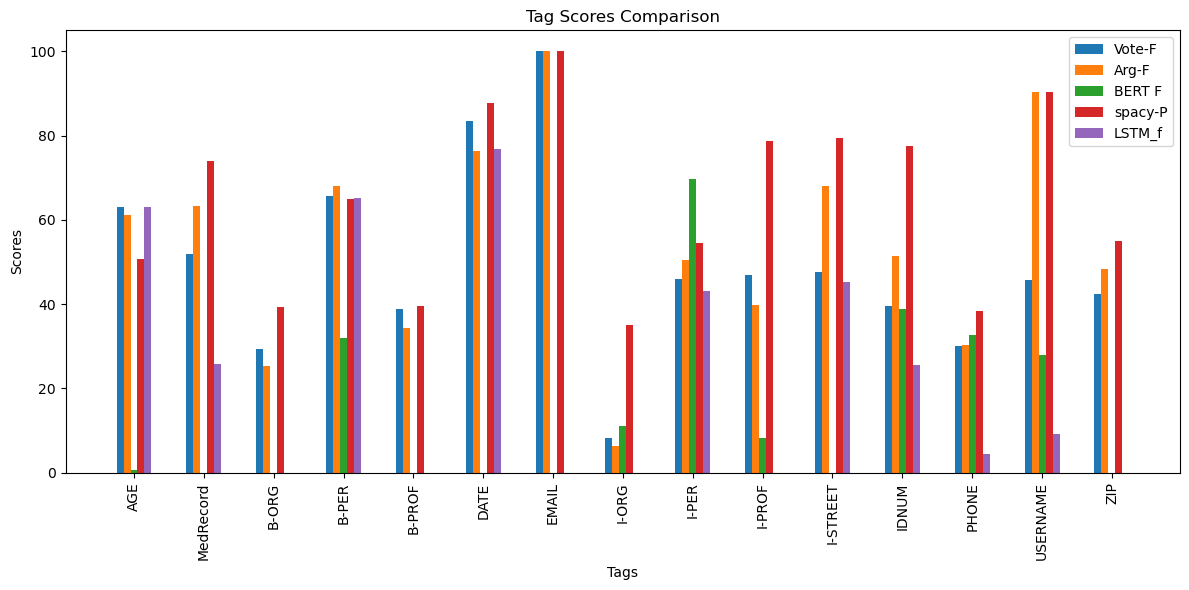

In [164]:
import matplotlib.pyplot as plt

# Data
tags = ['AGE', 'MedRecord', 'B-ORG', 'B-PER', 'B-PROF', 'DATE', 'EMAIL',
        'I-ORG', 'I-PER', 'I-PROF', 'I-STREET', 'IDNUM', 'PHONE', 'USERNAME', 'ZIP']
vote_f = [63.12, 51.88, 29.46, 65.73, 38.83, 83.49, 100, 8.33, 46.03, 46.83, 47.53, 39.57, 30.02, 45.76, 42.52]
arg_f = [61.1, 63.26, 25.4, 68.09, 34.22, 76.33, 100, 6.32, 50.59, 39.8, 67.99, 51.37, 30.34, 90.36, 48.38]
bert_f = [0.51, 0, 0, 31.93, 0, 0, 0, 11.06, 69.61, 8.33, 0, 38.82, 32.67, 28.03, 0]
spacy_p = [50.78, 74.04, 39.39, 64.95, 39.55, 87.73, 100, 35, 54.42, 78.67, 79.53, 77.51, 38.28, 90.36, 54.88]
lstm_f = [63.11, 25.74, 0, 65.15, 0, 76.81, 0, 0, 43, 0, 45.36, 25.61, 4.44, 9.2, 0]

# Plotting
plt.figure(figsize=(12, 6))
x = range(len(tags))
width = 0.1

plt.bar(x, vote_f, width=width, label='Vote-F')
plt.bar([i + width for i in x], arg_f, width=width, label='Arg-F')
plt.bar([i + 2 * width for i in x], bert_f, width=width, label='BERT F')
plt.bar([i + 3 * width for i in x], spacy_p, width=width, label='spacy-P')
plt.bar([i + 4 * width for i in x], lstm_f, width=width, label='LSTM_f')

plt.xlabel('Tags')
plt.ylabel('Scores')
plt.title('Tag Scores Comparison')
plt.xticks([i + 2 * width for i in x], tags, rotation=90)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()
